# 資料預處理

In [317]:
import os
os.chdir("C:\\Users\\zxpay\\Desktop\\BME_Senior\\EEG_CLF\\Music\\Code")
import sys

from Get_file import Get_file   # return dirpath, dirnames, filenames
import pandas as pd
from FFT import FFT, PlotDataOnTimeDomain
from BandPassFilter import BandPassFilter, PlotDataOnFreqDomain, BandPassListFilter
import pyedflib
import numpy as np
import datetime
from Danny_ML_CLF import Danny_ML_CLF

import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA, PCA

%matplotlib inline

data_path_third = "C:\\Users\\zxpay\\Desktop\\BME_Senior\\EEG_CLF\\Music\\第三首歌實驗數據"  # EEG Data direction

# Setting parameters
SampleFrequency = 128
DEBUG = True
LabelSize = 40
LowerFreqCut = 1
HigherFreqCut = 50
BandPassOrder = 9
channel_we_use = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]   # 0~39 共40, 14 channels we use
SAVE_FIG = False


In [2]:
def CalculateZeros(NumpyArray):
    LogicWithZeros = (NumpyArray == 0)
    return np.sum(LogicWithZeros)
def Cal(minu, sec):
    mid = minu*60 + sec
    return [mid-0, mid+60]

# TimeSecondsi : Occur seconds init
# TimeSecondsf : Occur seconds final
def GrabMusic(SignalList, StudentName, TimeList, fs=128):
    channel_we_use = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]   # 0~39 共40, 14 channels we use
    Indexi = TimeList[0] * fs
    Indexf = TimeList[1] * fs
    
    DataNums = int(len(SignalList)/2)
    for i in range(DataNums):
        StdName = SignalList[2*i+1]
        if StdName ==  StudentName:
            LabelNum = SignalList[i*2].shape[0]
            ReturnAllChannelTimeSliceData = np.zeros([len(channel_we_use), (Indexf-Indexi)], dtype=np.float32)
            for ch in range(LabelNum):
                ReturnAllChannelTimeSliceData[ch, :] = SignalList[i*2][ch][Indexi:Indexf]
                
            if CalculateZeros(ReturnAllChannelTimeSliceData) == 0:
                print(StdName, ReturnAllChannelTimeSliceData.shape)
                return ReturnAllChannelTimeSliceData
            else:
                print("Warning: Have Zero Values in the Numpy array !!!")
    print('None')
    return None

In [3]:
# 抓取第三首歌的數據
os.chdir(data_path_third)
PLOT_FLAG = False
Files = []
RawSignal = []
for _,files,_ in os.walk(data_path_third):
    if files != []:
        Files.append(files)
PeopleFiles = Files[0]  # Get All People files in this list

for name in PeopleFiles:
    _,_,file_names = Get_file(data_path_third+'\\'+name+'\\'+'原始資料')
    print(name)
    for fn in file_names:  # fn os file name
        if 'Fixedx.edf' in fn:
            StudentID = fn.split('.')[0][0:7]
            data_dir = data_path_third+'\\'+ name + '\\' + '原始資料' + '\\' + fn
            os.chdir(data_path_third+'\\'+ name + '\\' + '原始資料' + '\\')
            fedf = pyedflib.EdfReader(fn)
            n = fedf.signals_in_file
            signal_labels = np.asarray(fedf.getSignalLabels())
            sigbufs = np.zeros((len(channel_we_use), fedf.getNSamples()[0]))
            print('Data Shape : ', sigbufs.shape)
            CHCNT = 0
            for i in range(n):
                if i in channel_we_use:
                    sigbufs[CHCNT,:] = fedf.readSignal(i)
                    CHCNT+=1
                    if PLOT_FLAG:
                        plt.figure(figsize=(12,8))
                        x = np.linspace(0, sigbufs[i,:].shape[0]/128, sigbufs[i,:].shape[0])
                        plt.plot(x, sigbufs[i,:], 'r*')
                        plt.show()
            if CalculateZeros(sigbufs):
                print('Warning Have All zero in array !!!')
            RawSignal.append(sigbufs)
            RawSignal.append(name)

print('Data Length : ', len(RawSignal))
print('奇數是腦波數據\n偶數是實驗者')

佑信
Data Shape :  (14, 192000)
佳府
Data Shape :  (14, 192000)
侲儒
Data Shape :  (14, 192128)
偉倫
Data Shape :  (14, 192128)
冠廷
Data Shape :  (14, 192128)
冠翰
Data Shape :  (14, 192128)
凱佑
Data Shape :  (14, 192000)
凱文
Data Shape :  (14, 192128)
勁遠
Data Shape :  (14, 192384)
學明
Data Shape :  (14, 192128)
宜駿
Data Shape :  (14, 153600)
弘軒
Data Shape :  (14, 192000)
思強
Data Shape :  (14, 192128)
政豪
Data Shape :  (14, 192256)
旻位
Data Shape :  (14, 192128)
昀翔
Data Shape :  (14, 192128)
昆陽
Data Shape :  (14, 192128)
易儒
Data Shape :  (14, 207488)
易達
Data Shape :  (14, 153728)
柏廷
Data Shape :  (14, 192000)
柏澍
Data Shape :  (14, 192128)
柏瑋
Data Shape :  (14, 192128)
柏翰
Data Shape :  (14, 192256)
榮恩
Data Shape :  (14, 192256)
瑞堂
Data Shape :  (14, 192640)
竣宇
Data Shape :  (14, 192128)
聖書
Data Shape :  (14, 192128)
連成
Data Shape :  (14, 192256)
銘彥
Data Shape :  (14, 192128)
靖翔
Data Shape :  (14, 192128)
Data Length :  60
奇數是腦波數據
偶數是實驗者


In [4]:
# 沒有雙腦波差的數據
NormalSignal = []
# NormalSignal.append(GrabMusic(RawSignal, '佳府', Cal(2,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '佳府', Cal(5,0), fs=128))

# NormalSignal.append(GrabMusic(RawSignal, '旻位', Cal(1,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '旻位', Cal(2,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '旻位', Cal(3,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '旻位', Cal(4,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '旻位', Cal(5,0), fs=128))

NormalSignal.append(GrabMusic(RawSignal, '侲儒', Cal(1,0), fs=128))

# NormalSignal.append(GrabMusic(RawSignal, '冠廷', Cal(1,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '冠廷', Cal(2,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '冠廷', Cal(10,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '冠廷', Cal(11,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '冠廷', Cal(12,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '冠廷', Cal(13,0), fs=128))

# NormalSignal.append(GrabMusic(RawSignal, '冠翰', Cal(1,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '冠翰', Cal(2,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '冠翰', Cal(3,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '冠翰', Cal(4,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '冠翰', Cal(5,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '冠翰', Cal(6,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '冠翰', Cal(7,0), fs=128))

# NormalSignal.append(GrabMusic(RawSignal, '柏瑋', Cal(1,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '柏瑋', Cal(2,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '柏瑋', Cal(3,0), fs=128))

# NormalSignal.append(GrabMusic(RawSignal, '柏翰', Cal(1,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '柏翰', Cal(2,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '柏翰', Cal(3,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '柏翰', Cal(4,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '柏翰', Cal(5,0), fs=128))

# NormalSignal.append(GrabMusic(RawSignal, '思強', Cal(1,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '思強', Cal(2,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '思強', Cal(3,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '思強', Cal(4,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '思強', Cal(5,0), fs=128))

# NormalSignal.append(GrabMusic(RawSignal, '昀翔', Cal(1,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '昀翔', Cal(2,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '昀翔', Cal(3,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '昀翔', Cal(4,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '昀翔', Cal(5,0), fs=128))

# NormalSignal.append(GrabMusic(RawSignal, '聖書', Cal(1,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '聖書', Cal(2,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '聖書', Cal(3,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '聖書', Cal(4,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '聖書', Cal(5,0), fs=128))

# NormalSignal.append(GrabMusic(RawSignal, '銘彥', Cal(1,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '銘彥', Cal(2,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '銘彥', Cal(3,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '銘彥', Cal(4,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '銘彥', Cal(5,0), fs=128))

# NormalSignal.append(GrabMusic(RawSignal, '凱佑', Cal(1,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '凱佑', Cal(2,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '凱佑', Cal(3,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '凱佑', Cal(4,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '凱佑', Cal(5,0), fs=128))

# NormalSignal.append(GrabMusic(RawSignal, '學明', Cal(1,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '學明', Cal(2,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '學明', Cal(3,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '學明', Cal(4,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '學明', Cal(5,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '學明', Cal(6,0), fs=128))

# NormalSignal.append(GrabMusic(RawSignal, '竣宇', Cal(1,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '竣宇', Cal(2,0), fs=128))
# NormalSignal.append(GrabMusic(RawSignal, '竣宇', Cal(3,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '竣宇', Cal(4,0), fs=128))
NormalSignal.append(GrabMusic(RawSignal, '竣宇', Cal(5,0), fs=128))

print('Normal Length : ', len(NormalSignal))

佳府 (14, 7680)
旻位 (14, 7680)
旻位 (14, 7680)
侲儒 (14, 7680)
冠廷 (14, 7680)
冠廷 (14, 7680)
冠翰 (14, 7680)
冠翰 (14, 7680)
柏瑋 (14, 7680)
柏瑋 (14, 7680)
柏翰 (14, 7680)
柏翰 (14, 7680)
思強 (14, 7680)
思強 (14, 7680)
昀翔 (14, 7680)
昀翔 (14, 7680)
聖書 (14, 7680)
聖書 (14, 7680)
銘彥 (14, 7680)
銘彥 (14, 7680)
凱佑 (14, 7680)
凱佑 (14, 7680)
學明 (14, 7680)
學明 (14, 7680)
竣宇 (14, 7680)
竣宇 (14, 7680)
Normal Length :  26


In [5]:
# 有雙腦波差的數據
GrabSignal = []
# GrabSignal.append(GrabMusic(RawSignal, '佳府', Cal(7,0), fs=128))
# GrabSignal.append(GrabMusic(RawSignal, '佳府', Cal(11,0), fs=128))

GrabSignal.append(GrabMusic(RawSignal, '旻位', Cal(16,0), fs=128))
# GrabSignal.append(GrabMusic(RawSignal, '旻位', Cal(21,0), fs=128))
# GrabSignal.append(GrabMusic(RawSignal, '旻位', Cal(22,0), fs=128))
GrabSignal.append(GrabMusic(RawSignal, '旻位', Cal(23,0), fs=128))
GrabSignal.append(GrabMusic(RawSignal, '旻位', Cal(24,0), fs=128))

# GrabSignal.append(GrabMusic(RawSignal, '侲儒', Cal(2,0), fs=128))
# GrabSignal.append(GrabMusic(RawSignal, '侲儒', Cal(5,0), fs=128))
# GrabSignal.append(GrabMusic(RawSignal, '侲儒', Cal(7,0), fs=128))
# GrabSignal.append(GrabMusic(RawSignal, '侲儒', Cal(8,0), fs=128))
# GrabSignal.append(GrabMusic(RawSignal, '侲儒', Cal(9,0), fs=128))
# GrabSignal.append(GrabMusic(RawSignal, '侲儒', Cal(11,0), fs=128))
GrabSignal.append(GrabMusic(RawSignal, '侲儒', Cal(12,0), fs=128))
GrabSignal.append(GrabMusic(RawSignal, '侲儒', Cal(13,0), fs=128))
GrabSignal.append(GrabMusic(RawSignal, '侲儒', Cal(14,0), fs=128))
# GrabSignal.append(GrabMusic(RawSignal, '侲儒', Cal(15,0), fs=128))
# GrabSignal.append(GrabMusic(RawSignal, '侲儒', Cal(17,0), fs=128))
# GrabSignal.append(GrabMusic(RawSignal, '侲儒', Cal(18,0), fs=128))
GrabSignal.append(GrabMusic(RawSignal, '侲儒', Cal(20,0), fs=128))
GrabSignal.append(GrabMusic(RawSignal, '侲儒', Cal(21,0), fs=128))
GrabSignal.append(GrabMusic(RawSignal, '侲儒', Cal(24,1), fs=128))

# GrabSignal.append(GrabMusic(RawSignal, '冠廷', Cal(4,0), fs=128))
GrabSignal.append(GrabMusic(RawSignal, '冠廷', Cal(6,0), fs=128))
# GrabSignal.append(GrabMusic(RawSignal, '冠廷', Cal(7,0), fs=128))

# GrabSignal.append(GrabMusic(RawSignal, '冠翰', Cal(13,0), fs=128))
# GrabSignal.append(GrabMusic(RawSignal, '冠翰', Cal(14,0), fs=128))
# GrabSignal.append(GrabMusic(RawSignal, '冠翰', Cal(16,0), fs=128))
GrabSignal.append(GrabMusic(RawSignal, '冠翰', Cal(17,0), fs=128))

GrabSignal.append(GrabMusic(RawSignal, '柏瑋', Cal(5,0), fs=128))
GrabSignal.append(GrabMusic(RawSignal, '柏瑋', Cal(11,0), fs=128))
GrabSignal.append(GrabMusic(RawSignal, '柏瑋', Cal(16,0), fs=128))

# GrabSignal.append(GrabMusic(RawSignal, '柏翰', Cal(24,0), fs=128))

# GrabSignal.append(GrabMusic(RawSignal, '偉倫', Cal(12,0), fs=128))
GrabSignal.append(GrabMusic(RawSignal, '偉倫', Cal(13,0), fs=128))
# GrabSignal.append(GrabMusic(RawSignal, '偉倫', Cal(14,0), fs=128))
# GrabSignal.append(GrabMusic(RawSignal, '偉倫', Cal(18,0), fs=128))
# GrabSignal.append(GrabMusic(RawSignal, '偉倫', Cal(19,0), fs=128))
GrabSignal.append(GrabMusic(RawSignal, '偉倫', Cal(20,0), fs=128))

GrabSignal.append(GrabMusic(RawSignal, '凱佑', Cal(18,0), fs=128))
GrabSignal.append(GrabMusic(RawSignal, '凱佑', Cal(20,0), fs=128))

GrabSignal.append(GrabMusic(RawSignal, '竣宇', Cal(19,0), fs=128))

GrabSignal.append(GrabMusic(RawSignal, '靖翔', Cal(1,0), fs=128))

# GrabSignal.append(GrabMusic(RawSignal, '銘彥', Cal(13,0), fs=128))
GrabSignal.append(GrabMusic(RawSignal, '銘彥', Cal(20,0), fs=128))
# GrabSignal.append(GrabMusic(RawSignal, '銘彥', Cal(23,0), fs=128))
# GrabSignal.append(GrabMusic(RawSignal, '銘彥', Cal(24,0), fs=128))

# GrabSignal.append(GrabMusic(RawSignal, '學明', Cal(16,0), fs=128))
# GrabSignal.append(GrabMusic(RawSignal, '學明', Cal(17,0), fs=128))
# GrabSignal.append(GrabMusic(RawSignal, '學明', Cal(20,0), fs=128))

print('Grab Length : ', len(GrabSignal))

旻位 (14, 7680)
旻位 (14, 7680)
旻位 (14, 7680)
侲儒 (14, 7680)
侲儒 (14, 7680)
侲儒 (14, 7680)
侲儒 (14, 7680)
侲儒 (14, 7680)
侲儒 (14, 7680)
冠廷 (14, 7680)
冠翰 (14, 7680)
柏瑋 (14, 7680)
柏瑋 (14, 7680)
柏瑋 (14, 7680)
偉倫 (14, 7680)
偉倫 (14, 7680)
凱佑 (14, 7680)
凱佑 (14, 7680)
竣宇 (14, 7680)
靖翔 (14, 7680)
銘彥 (14, 7680)
Grab Length :  21


In [80]:
PLOT_FLAG = False
# 8~40 Hz as my features (33 dimensions)

features_num = 64

signal_features = np.zeros([14, 1260, features_num], dtype=np.float32)   # 21 * 60
cnt = 0
for i in range(len(GrabSignal)):
    Split_Times = int(GrabSignal[i].shape[1]/128)
    Split_Num = 0
    for sp in range(Split_Times):
        for ch in range(len(channel_we_use)):
            data = GrabSignal[i][ch][Split_Num:Split_Num+SampleFrequency]
            BandPassData = BandPassFilter(data, LowerFreqCut, HigherFreqCut, SampleFrequency)
            SignalFreqX, FFTData = FFT(BandPassData, SampleFrequency, SampleFrequency)
            signal_features[ch, cnt, :] = FFTData[:]  # 8~40 Hz
            if PLOT_FLAG:
                plt.figure(figsize=(20,8))
                plt.plot(SignalFreqX[:], FFTData[:], '*-')
                plt.show()
        Split_Num = Split_Num + SampleFrequency
        cnt+=1
if CalculateZeros(signal_features) != 0:
    print('Warning !!!')
print('Sleep Data Shape : ', signal_features.shape)   

Sleep Data Shape :  (14, 1260, 64)


In [81]:
PLOT_FLAG = False
# 8~40 Hz as my features (33 dimensions)
# Normal
features_num = 64

signal_Normal = np.zeros([14, 1560, features_num], dtype=np.float32)  # 26 * 60
cnt = 0
for i in range(len(NormalSignal)):
    Split_Times = int(NormalSignal[i].shape[1]/128)
    Split_Num = 0
    for sp in range(Split_Times):
        for ch in range(len(channel_we_use)):
            data = NormalSignal[i][ch][Split_Num:Split_Num+SampleFrequency]
            BandPassData = BandPassFilter(data, LowerFreqCut, HigherFreqCut, SampleFrequency)
            SignalFreqX, FFTData = FFT(BandPassData, SampleFrequency, SampleFrequency)
            signal_Normal[ch, cnt, :] = FFTData[:]  # 8~40 Hz
            if PLOT_FLAG:
                plt.figure(figsize=(20,8))
                plt.plot(SignalFreqX[:], FFTData[:], '*-')
                plt.show()
        Split_Num = Split_Num + SampleFrequency
        cnt+=1
if CalculateZeros(signal_Normal) != 0:
    print('Warning !!!')
print('Normal Data Shape : ', signal_Normal.shape)   

Normal Data Shape :  (14, 1560, 64)


In [10]:
# Create Labels
# ch_choose = 11
# label1 = np.ones(signal_features.shape[1]) * 1
# label2 = np.ones(signal_Normal.shape[1]) * 0
# label = np.hstack((label1, label2))

# data = np.vstack((signal_features[ch_choose,:,:], signal_Normal[ch_choose,:,:]))

# print(label.shape)
# print(data.shape)

In [314]:
ch_choose = 1
os.chdir('C:\\Users\\zxpay\\Desktop\\BME_Senior\\EEG_CLF\\Music\\Code')
#for ch_choose in range(14):
label1 = np.ones(signal_features.shape[1]) * 1
label2 = np.ones(signal_Normal.shape[1]) * 0
label = np.hstack((label1, label2))

data = np.vstack((signal_features[ch_choose,:,:], signal_Normal[ch_choose,:,:]))

clf = Danny_ML_CLF()
train_X, test_X, train_y, test_y = clf.Split_data(data, label, test_size=0.3, Standard=True)
clf.Fit_value(train_X, train_y)
clf.Train()
clf.Report(train_X, train_y, [1,2], show_cm=False)
clf.Report2txt('Train'+ str(ch_choose+1) + '.txt')
print(clf.Score())
print()
clf.Report(test_X, test_y, [1,2], show_cm=False)
clf.Report2txt('Test'+ str(ch_choose+1) + '.txt')
print(clf.Score())
print('Report Okay !\n\n')

C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.6717325227963525
Tree Score :  0.6859169199594731
Bayes Score :  0.6666666666666666
KNN Score :  1.0
XGB Score :  0.878419452887538
Stacking Score :  1.0
Voting Score :  0.9807497467071935
Bagging Score :  1.0
RF Score :  1.0
Adaboost Score :  0.7669706180344478
None



C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.6111111111111112
Tree Score :  0.5910165484633569
Bayes Score :  0.6288416075650118
KNN Score :  0.549645390070922
XGB Score :  0.7044917257683215
Stacking Score :  0.549645390070922
Voting Score :  0.6962174940898345
Bagging Score :  0.6973995271867612
RF Score :  0.7009456264775413
Adaboost Score :  0.6548463356973995
None
Report Okay !




C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [300]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init='k-means++')
y_pred = km.fit_predict(test_X)



In [301]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(train_X)

from sklearn.cluster import AgglomerativeClustering
aggc = AgglomerativeClustering(linkage='ward',n_clusters=2)
y_pred_aggc = aggc.fit_predict(train_X)

from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, verbose=0)
y_pred_km = km.fit_predict(train_X)

In [302]:
print(np.sum(y_pred_dbscan==train_y)/(train_y.shape[0]))
print(np.sum(y_pred_aggc==train_y)/(train_y.shape[0]))
print(np.sum(y_pred_km==train_y)/(train_y.shape[0]))

0.5020263424518744
0.5597771023302939
0.5557244174265451


In [303]:
y_pred_dbscan

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [304]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])

In [305]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
label_onehot = one.fit_transform(label.reshape(-1,1)).toarray()
train_X, test_X, train_y, test_y = clf.Split_data(data, label_onehot, test_size=0.25, Standard=True)
train_y.shape

(2115, 2)

In [306]:
from keras.callbacks import EarlyStopping
earlyStopping=EarlyStopping(monitor='val_loss', patience=10) #patience:number of epochs with no improvement after which training will be stopped.

In [307]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
model = Sequential()
model.add(Dense(128, input_dim=64, kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(16, kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [308]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_X, train_y, epochs=100, batch_size=100, validation_split=0.25, verbose=1, callbacks=[earlyStopping])

Train on 1586 samples, validate on 529 samples
Epoch 1/100
1586/1586 [==============================] - 3s 2ms/step - loss: 0.6717 - acc: 0.6028 - val_loss: 0.6891 - val_acc: 0.5784
Epoch 2/100
1586/1586 [==============================] - 0s 121us/step - loss: 0.6359 - acc: 0.6450 - val_loss: 0.6881 - val_acc: 0.5992
Epoch 3/100
1586/1586 [==============================] - 0s 104us/step - loss: 0.6184 - acc: 0.6784 - val_loss: 0.6856 - val_acc: 0.6163
Epoch 4/100
1586/1586 [==============================] - 0s 101us/step - loss: 0.6136 - acc: 0.6633 - val_loss: 0.6846 - val_acc: 0.6238
Epoch 5/100
1586/1586 [==============================] - 0s 99us/step - loss: 0.5933 - acc: 0.6892 - val_loss: 0.6816 - val_acc: 0.6087
Epoch 6/100
1586/1586 [==============================] - 0s 97us/step - loss: 0.5791 - acc: 0.7024 - val_loss: 0.6845 - val_acc: 0.5879
Epoch 7/100
1586/1586 [==============================] - 0s 98us/step - loss: 0.5736 - acc: 0.7119 - val_loss: 0.6829 - val_acc: 0.5652

In [309]:
score = model.evaluate(test_X, test_y, batch_size=100)
score

705/705 [==============================] - 0s 43us/step


[0.714044690977597, 0.6326240878155891]

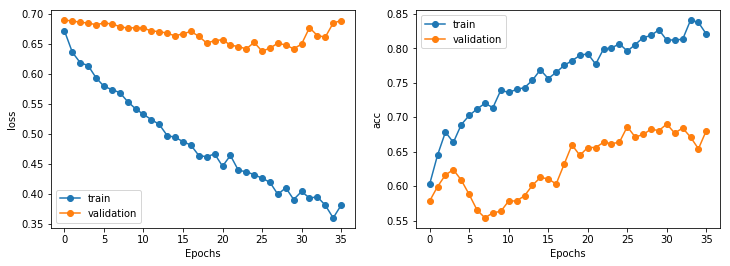

In [310]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc')

In [311]:
model.predict(test_X)

array([[0.74837464, 0.00485333],
       [0.13798182, 0.34832716],
       [0.3865049 , 0.11568107],
       ...,
       [0.91245395, 0.99999607],
       [0.10534941, 0.19222169],
       [0.6317899 , 0.03075983]], dtype=float32)

In [312]:
test_y

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [334]:
data_df = pd.DataFrame(data)
label_df = pd.DataFrame(label, columns=[64])
All_df = pd.concat([data_df, label_df], axis=1)

In [342]:
a = All_df.corr()[64]

In [357]:
b = []
for i in range(65):
    if a[i] != 1.:
        b.append(a[i])

In [359]:
max(b)

0.04095950916125926